**Importing libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import keras
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading test data and extracting its features**

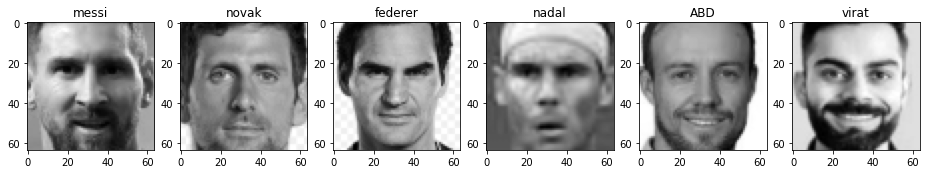

In [ ]:
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Face rec test drawings/haarcascade_frontalface_default.xml')   # Face detection classifier

images = []
data_features = []
names = ['messi', 'novak', 'federer', 'nadal', 'ABD', 'virat']    # names of person in test data
model = keras.models.load_model('/content/drive/MyDrive/final-model.h5')    # Load the model saved in 'model training' notebook

for i in range(1,7):

  # Load the test images and preprocess it to make it compatible for the model
  image = cv.imread('/content/drive/MyDrive/Face rec test drawings/' + str(i) + '.png')
  gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)            # Convert to gray scale
  face = face_cascade.detectMultiScale(gray, 1.3, 5)      # Face detection
  x, y, w, h = face[0]
  image = image[y:y+h, x:x+w]        # Cropping

  image = cv.resize(image, (64, 64), interpolation = cv.INTER_AREA)   # Resize 
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)      # Convert to gray scale
  image = image / 255                                # normalize
  image = np.reshape(image, (1, 64, 64, 1))

  im_feat = model(image)           # Extract features
  images.append(image[0,:,:,0])    # Test data images
  data_features.append(im_feat)    # Test data features
  
fig, ax = plt.subplots(1, 6, figsize = (16, 40))
k = 0
for i in images:
  ax[k].imshow(i, 'gray')
  ax[k].set_title(names[k])
  k = k + 1

**Test image 1**

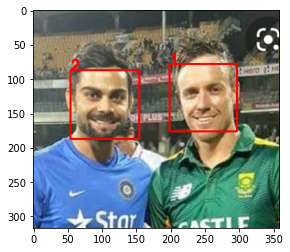

In [ ]:
img = cv.imread('/content/drive/MyDrive/Face rec test drawings/test1.png',1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
colour = cv.cvtColor(img, cv.COLOR_BGR2RGB)
font = cv.FONT_HERSHEY_SIMPLEX

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
detected_img_feat = []
k = 1

for (x,y,w,h) in faces:
    cv.rectangle(colour, (x,y), (x+w,y+h), (255 ,0, 0), 2)
    cv.putText(colour, str(k), (x,y), font, 0.7, (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv.resize(roi_gray, (64, 64), interpolation = cv.INTER_AREA)
    roi_gray = roi_gray / 255
    k = k + 1

    feat = model(np.reshape(roi_gray, (1, 64, 64, 1)))
    detected_img_feat.append(feat)
    
plt.imshow(colour)
plt.show()

In [ ]:
threshold = 10
person_number = 0

for features in detected_img_feat:
  person_number = person_number + 1
  for i in range(len(data_features)):
    dist = np.sum(np.square(data_features[i] - features))
    
    if (dist <= threshold):
      print('Person {} is {}'.format(person_number, names[i]))

Person 1 is ABD
Person 2 is virat


**Test image 2**

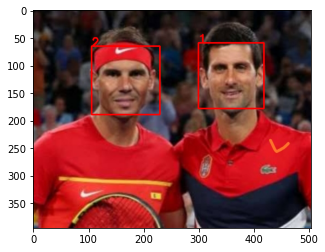

In [ ]:
img = cv.imread('/content/drive/MyDrive/Face rec test drawings/test2.png',1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
colour = cv.cvtColor(img, cv.COLOR_BGR2RGB)
font = cv.FONT_HERSHEY_SIMPLEX

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
detected_img_feat = []
k = 1

for (x,y,w,h) in faces:
    cv.rectangle(colour, (x,y), (x+w,y+h), (255 ,0, 0), 2)
    cv.putText(colour, str(k), (x,y), font, 0.7, (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv.resize(roi_gray, (64, 64), interpolation = cv.INTER_AREA)
    roi_gray = roi_gray / 255
    k = k + 1

    feat = model(np.reshape(roi_gray, (1, 64, 64, 1)))
    detected_img_feat.append(feat)
    
plt.imshow(colour)
plt.show()

In [ ]:
threshold = 10
person_number = 0

for features in detected_img_feat:
  person_number = person_number + 1
  for i in range(len(data_features)):
    dist = np.sum(np.square(data_features[i] - features))
    
    if (dist <= threshold):
      print('Person {} is {}'.format(person_number, names[i]))

Person 1 is novak
Person 2 is nadal


**Test image 3**

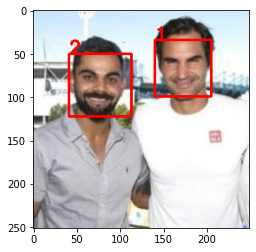

In [ ]:
img = cv.imread('/content/drive/MyDrive/Face rec test drawings/test3.png',1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
colour = cv.cvtColor(img, cv.COLOR_BGR2RGB)
font = cv.FONT_HERSHEY_SIMPLEX

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
detected_img_feat = []
k = 1

for (x,y,w,h) in faces:
    cv.rectangle(colour, (x,y), (x+w,y+h), (255 ,0, 0), 2)
    cv.putText(colour, str(k), (x,y), font, 0.7, (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv.resize(roi_gray, (64, 64), interpolation = cv.INTER_AREA)
    roi_gray = roi_gray / 255
    k = k + 1

    feat = model(np.reshape(roi_gray, (1, 64, 64, 1)))
    detected_img_feat.append(feat)
    
plt.imshow(colour)
plt.show()

In [ ]:
threshold = 10
person_number = 0

for features in detected_img_feat:
  person_number = person_number + 1
  for i in range(len(data_features)):
    dist = np.sum(np.square(data_features[i] - features))
    
    if (dist <= threshold):
      print('Person {} is {}'.format(person_number, names[i]))

Person 1 is novak
Person 1 is federer
Person 1 is nadal
Person 2 is virat
